In [196]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [197]:
df = pd.read_csv('HistoricalData.csv')
df

,Date,Close/Last,Volume,Open,High,Low
0,11/22/2023,$191.31,39630010,$191.49,$192.93,$190.825
1,11/21/2023,$190.64,38134490,$191.41,$191.52,$189.74
2,11/20/2023,$191.45,46538610,$189.89,$191.905,$189.88
3,11/17/2023,$189.69,50941400,$190.25,$190.38,$188.57
4,11/16/2023,$189.71,54412920,$189.57,$190.96,$188.65
...,...,...,...,...,...,...
1252,11/30/2018,$44.645,157697040,$45.0725,$45.0825,$44.2575
1253,11/29/2018,$44.8875,166094320,$45.665,$45.70,$44.425
1254,11/28/2018,$45.235,183767000,$44.1825,$45.3225,$43.7325
1255,11/27/2018,$43.56,164624560,$42.8775,$43.6925,$42.72


In [198]:
df = df.drop(['Open', 'High', 'Low', 'Volume'], axis=1)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


In [199]:
# Remove dollar signs and commas from the Close column
df['Close/Last'] = df['Close/Last'].str.replace('$', '')
df['Close/Last'] = df['Close/Last'].str.replace(',', '')

# Convert the Close column to float data type
df['Close/Last'] = df['Close/Last'].astype(float)


C:\Users\Anish\AppData\Local\Temp/ipykernel_7472/3291583229.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Close/Last'] = df['Close/Last'].str.replace('$', '')


In [200]:
n_steps = 50

train_data = []
target_data = []

for i in range(n_steps, len(df)-1):
    X = df['Close/Last'][i-n_steps:i].values.reshape(n_steps, 1)
    y = df['Close/Last'][i+1]
    train_data.append(X)
    target_data.append(y)

train_data = np.array(train_data)
target_data = np.array(target_data)


print(train_data.shape)   
print(target_data.shape) 


(1206, 50, 1)
(1206,)


In [201]:
scaler = MinMaxScaler()

train_data = train_data.reshape(train_data.shape[0], train_data.shape[1])
train_data = scaler.fit_transform(train_data)

train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], 1)
target_data = scaler.fit_transform(target_data.reshape(-1, 1))


In [202]:
lookback = 50
batch_size = 32
epochs = 125


In [203]:
X_train, X_test, Y_train, Y_test = train_test_split(train_data, target_data, test_size=0.2, shuffle=False)


In [204]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [205]:
model = Sequential()
# First LSTM Layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
# Second LSTM Layer
model.add(LSTM(units=50, return_sequences=False))
# Dense layer with 25 neurons
model.add(Dense(25))
# Dense layer for single output neuron
model.add(Dense(1))

In [206]:
model.compile(loss='mean_squared_error', optimizer='adam')


In [207]:
history = model.fit(X_train,Y_train, epochs=epochs,batch_size=batch_size, validation_data=(X_test, Y_test))

Epoch 1/125
31/31 [==============================] - 7s 99ms/step - loss: 0.0654 - val_loss: 0.0266
Epoch 2/125
31/31 [==============================] - 2s 56ms/step - loss: 0.0046 - val_loss: 0.0074
Epoch 3/125
31/31 [==============================] - 2s 52ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 4/125
31/31 [==============================] - 2s 52ms/step - loss: 0.0018 - val_loss: 2.1479e-04
Epoch 5/125
31/31 [==============================] - 2s 51ms/step - loss: 0.0018 - val_loss: 3.2735e-04
Epoch 6/125
31/31 [==============================] - 2s 51ms/step - loss: 0.0017 - val_loss: 2.5104e-04
Epoch 7/125
31/31 [==============================] - 2s 50ms/step - loss: 0.0016 - val_loss: 1.8777e-04
Epoch 8/125
31/31 [==============================] - 2s 49ms/step - loss: 0.0016 - val_loss: 2.2633e-04
Epoch 9/125
31/31 [==============================] - 2s 51ms/step - loss: 0.0015 - val_loss: 2.6576e-04
Epoch 10/125
31/31 [==============================] - 2s 50ms/step - loss: 0

Epoch 78/125
31/31 [==============================] - 1s 43ms/step - loss: 7.0538e-04 - val_loss: 9.6694e-05
Epoch 79/125
31/31 [==============================] - 1s 42ms/step - loss: 7.6776e-04 - val_loss: 7.3819e-05
Epoch 80/125
31/31 [==============================] - 1s 43ms/step - loss: 6.9909e-04 - val_loss: 9.3009e-05
Epoch 81/125
31/31 [==============================] - 1s 43ms/step - loss: 9.4041e-04 - val_loss: 7.8710e-05
Epoch 82/125
31/31 [==============================] - 1s 43ms/step - loss: 7.1724e-04 - val_loss: 7.7939e-05
Epoch 83/125
31/31 [==============================] - 1s 43ms/step - loss: 6.9321e-04 - val_loss: 9.3108e-05
Epoch 84/125
31/31 [==============================] - 1s 42ms/step - loss: 6.9805e-04 - val_loss: 1.3931e-04
Epoch 85/125
31/31 [==============================] - 1s 42ms/step - loss: 6.7917e-04 - val_loss: 6.9798e-05
Epoch 86/125
31/31 [==============================] - 1s 43ms/step - loss: 6.4665e-04 - val_loss: 1.3824e-04
Epoch 87/125
31/31 

In [208]:
loss = model.evaluate(X_test, Y_test)
print('Test Loss:', loss)


8/8 [==============================] - 0s 19ms/step - loss: 6.1383e-05
Test Loss: 6.138304161140695e-05


In [209]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
mse = mean_squared_error(Y_test, predictions)
predictions = scaler.inverse_transform(predictions)
mse

8/8 [==============================] - 1s 19ms/step


6.138304694414499e-05

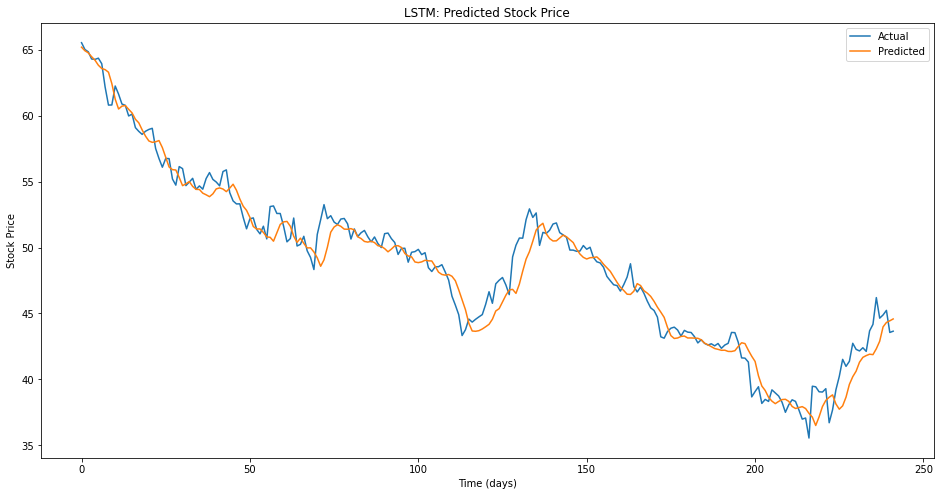

In [210]:
import matplotlib.pyplot as plt

actual_values = scaler.inverse_transform(Y_test)

# Plot the actual and predicted values
plt.figure(figsize=(16, 8))
plt.plot(actual_values, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('LSTM: Predicted Stock Price')
plt.xlabel('Time (days)')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
